# Porosity distribution


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_excel(r'Documents\po.xlsx',usecols='B')
df.head()

,porosity
0,17.0
1,14.7
2,8.3
3,17.6
4,26.3


In [4]:
df.porosity.min(),df.porosity.max() 

(8.3, 31.8)

In [5]:
df[df<10]=8 
x=list(df.porosity) 

In [6]:
ranges=np.arange(df.porosity.min(),df.porosity.max()+1, 2).tolist() 
ranges

[8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 30.0, 32.0]

In [7]:
ncut = pd.cut(x,ranges,right=False,)

df2 = pd.DataFrame(ncut.describe())
df2['freqs(%)']=df2.freqs*100
df2

,counts,freqs,freqs(%)
categories,,,
"[8.0, 10.0)",1,0.034483,3.448276
"[10.0, 12.0)",0,0.000000,0.000000
"[12.0, 14.0)",1,0.034483,3.448276
"[14.0, 16.0)",3,0.103448,10.344828
"[16.0, 18.0)",4,0.137931,13.793103
"[18.0, 20.0)",8,0.275862,27.586207
"[20.0, 22.0)",1,0.034483,3.448276
"[22.0, 24.0)",1,0.034483,3.448276
"[24.0, 26.0)",3,0.103448,10.344828


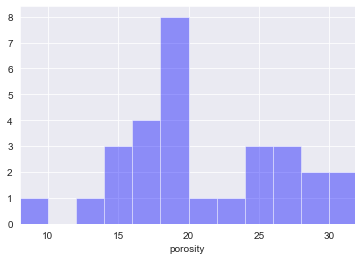

In [8]:
sns.set_style('darkgrid')
sns.distplot(df['porosity'],bins=ranges,kde=False,color='b')#freq
plt.xlim(df.porosity.min(),df.porosity.max())

plt.show()

In [9]:
df2['cum freq'] = df2['freqs(%)'].cumsum()   #cum freq
a=np.arange(9,33,2)     #mid points
df2['m']= a    
df2

,counts,freqs,freqs(%),cum freq,m
categories,,,,,
"[8.0, 10.0)",1,0.034483,3.448276,3.448276,9
"[10.0, 12.0)",0,0.000000,0.000000,3.448276,11
"[12.0, 14.0)",1,0.034483,3.448276,6.896552,13
"[14.0, 16.0)",3,0.103448,10.344828,17.241379,15
"[16.0, 18.0)",4,0.137931,13.793103,31.034483,17
"[18.0, 20.0)",8,0.275862,27.586207,58.620690,19
"[20.0, 22.0)",1,0.034483,3.448276,62.068966,21
"[22.0, 24.0)",1,0.034483,3.448276,65.517241,23
"[24.0, 26.0)",3,0.103448,10.344828,75.862069,25


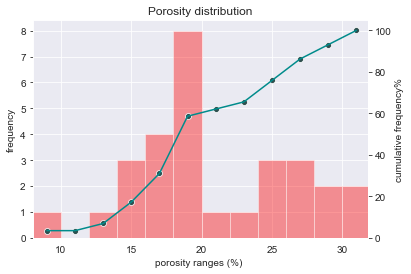

In [10]:
sns.set_style('darkgrid') 
ax=sns.distplot(df['porosity'],bins=ranges,kde=False,norm_hist=False,color='r')
plt.ylabel('frequency')
plt.xlabel('porosity ranges (%) ')
ax2=ax.twinx()
sns.scatterplot(df2['m'],df2['cum freq'],color='darkslategrey')
  
sns.lineplot(data=df2,x=df2['m'], y=df2['cum freq'],markers=True, dashes=False,color='darkcyan')
    

plt.title('Porosity distribution')
plt.ylabel('cumulative frequency%')

plt.xlim(df.porosity.min(),df.porosity.max())
plt.ylim(0,)
plt.grid(None)  
plt.show()

In [11]:
print('MEAN POROSITY  : ',float("{:.2f}".format(df.porosity.mean())),'%')
print('MEDIAN POROSITY: ',float( "{:.2f}".format(df.porosity.median())),'%')

MEAN POROSITY  :  20.87 %
MEDIAN POROSITY:  19.3 %
